In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Syntax to load the csv file in which I'm having the IPL data Dataset.
ipl_data=pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python EDA\IPL EDA\matches.csv")

In [7]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [72]:
# Syntax to take a look on the IPL dataset by loading 5 Rows:
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


## Total number of IPL matches played till 2019 ##

In [9]:
# Total number of IPL matches till 2019
ipl_data.shape

(756, 18)

In [10]:
# Syntax to check the Column names with the total number of Non-null values and Data-Type present in the dataset columns:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
# Syntax to check if an null values are present in the IPL Data dataset:
null_count=ipl_data.isnull().sum()
column_with_null=null_count[null_count>0].sort_values(ascending=False)
print(column_with_null)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
dtype: int64


* The **'umpire3'** column has the highest number of null values,
* with 637 missing entries. Following that, the **'city'** column has 7 null values,
* **'winner'** and **'player_of_match'** columns each have 4 null values,
* and both **'umpire1'** and **'umpire2'** columns have 2 null values each.

# Handling missing data:

In [12]:
ipl_data.drop('umpire3',axis=1,inplace=True)

ipl_data.dropna(subset=['city'], inplace=True) 
ipl_data.dropna(subset=['winner'], inplace=True)
ipl_data.dropna(subset=['player_of_match'], inplace=True)
ipl_data.dropna(subset=['umpire1'], inplace=True)
ipl_data.dropna(subset=['umpire2'], inplace=True)

In [13]:
# Getting the shape of the IPL dataset after removing "umpire3" column and dropping all the Rows with NULL values:
col_row=ipl_data.shape
print(f"Total Column is: {col_row[0]}\nTotal Row is: {col_row[1]}")

Total Column is: 743
Total Row is: 17


In [14]:
# Summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns:
ipl_data.describe().round(2)

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.00,743.00,743.00,743.00,743.00
mean,1786.58,2013.42,0.03,13.46,3.38
std,3455.05,3.38,0.16,23.63,3.39
min,1.00,2008.00,0.00,0.00,0.00
25%,187.50,2011.00,0.00,0.00,0.00
50%,374.00,2013.00,0.00,0.00,4.00
75%,567.50,2016.00,0.00,19.00,6.00
max,11415.00,2019.00,1.00,146.00,10.00


# Observations

These are the inferences that can be made from the describe() method:
* The CSV file includes information about IPL matches, covering the period from the 2008 season to 2019.
* **The largest margin of victory for a team batting first (win_by_runs) is 146 runs.**
* **The most significant victory for the team batting second (win_by_wickets) is by 10 wickets.**
* **In 75% of the cases where the team batting first emerged victorious, they won by a margin of 19 runs.**
* **In 75% of the instances where the team batting second secured a victory, they won by a margin of 6 wickets.**
* **A total of 756 IPL matches were hosted between the years 2008 and 2019.**

In [15]:
# Syntax to get all the available column with respect to their name:
for i in range(len(ipl_data.columns)):
    print(i+1,"",ipl_data.columns[i])

1  id
2  season
3  city
4  date
5  team1
6  team2
7  toss_winner
8  toss_decision
9  result
10  dl_applied
11  winner
12  win_by_runs
13  win_by_wickets
14  player_of_match
15  venue
16  umpire1
17  umpire2


Here's a brief description for each column in the IPL dataset based on the column names that are Present in the Dataset:

1. **id:** Unique identifier for each match.
2. **season:** The season in which the match took place.
3. **city:** The city where the match was played.
4. **date:** The date on which the match was played
.
5. **team1:** The first team playing in the match.
6. **team2:** The second team playing in the match.
7. **toss_winner:** The team that won the toss.
8. **toss_decision:** The decision (batting or bowling) made by the team that won the toss.
9. **result:** The result of the match (e.g., normal, tie, no result).
10. **dl_applied:** Whether the Duckworth-Lewis method was applied (1 if applied, 0 otherwise) This method is only applied when there is a Rainfall.
11. **winner:** The team that won the match.
12. **win_by_runs:** The margin of victory in terms of runs (positive value).
13. **win_by_wickets:** The margin of victory in terms of wickets (positive value).
14. **player_of_match:** The player who was awarded the Man of the Match.
15. **venue:** The venue where the match was played.
16. **umpire1:** The first on-field umpire.
17. **umpire2:** The second on-field umpire.
18. **umpire3:** The third umpire, if present.

In [16]:
# Getting the frequency of most man of the match awards:
ipl_data["player_of_match"].value_counts()

player_of_match
CH Gayle           21
AB de Villiers     20
RG Sharma          17
DA Warner          17
MS Dhoni           17
                   ..
NV Ojha             1
KM Jadhav           1
AC Voges            1
AA Jhunjhunwala     1
S Hetmyer           1
Name: count, Length: 226, dtype: int64

## Top 10 Players with most Man of the Match award

In [17]:
# Getting the Count of top 10 PLayers who achieved most man of the Match awards:
for i in range(10):
    print(i+1, "", ipl_data["player_of_match"].value_counts().index[i],":", ipl_data["player_of_match"].value_counts().iloc[i])

1  CH Gayle : 21
2  AB de Villiers : 20
3  RG Sharma : 17
4  DA Warner : 17
5  MS Dhoni : 17
6  YK Pathan : 16
7  SR Watson : 15
8  SK Raina : 14
9  G Gambhir : 13
10  MEK Hussey : 12


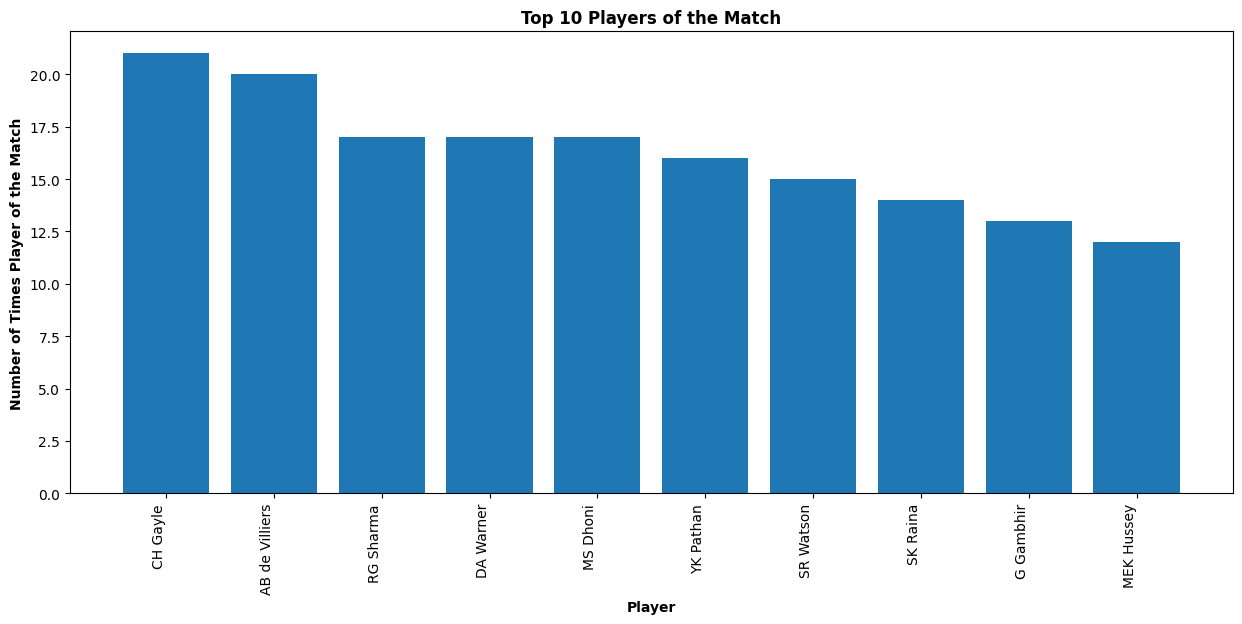

In [18]:
# Creating a Bar plot for the top 10 players who have won "Man Of The Match" award:
plt.figure(figsize=(15, 6))

# Extracting the top 10 players and their counts
top_players = ipl_data["player_of_match"].value_counts()[:10]

# Creating a bar plot
plt.bar(top_players.index, top_players)

# Adding labels and title
plt.xlabel("Player",fontweight='bold')
plt.ylabel("Number of Times Player of the Match",fontsize=10,fontweight='bold')
plt.title("Top 10 Players of the Match",fontweight='bold')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90, ha="right")

# Displaying the plot
plt.show()


In [19]:
# Getting the Count for all the results in "result" Column:
result_output=ipl_data["result"].value_counts()
for result,count in result_output.items():
    print(f"{result}: {count}")

normal: 734
tie: 9


## Getting the total Count for all the team who won the Toss in "toss_winner" column

In [20]:
toss_win=ipl_data["toss_winner"].value_counts()
for name, count in toss_win.items():
    print(f"{name}: {count}")

Mumbai Indians: 96
Kolkata Knight Riders: 91
Chennai Super Kings: 89
Kings XI Punjab: 80
Delhi Daredevils: 79
Royal Challengers Bangalore: 78
Rajasthan Royals: 77
Sunrisers Hyderabad: 45
Deccan Chargers: 43
Pune Warriors: 20
Gujarat Lions: 15
Delhi Capitals: 9
Kochi Tuskers Kerala: 8
Rising Pune Supergiants: 7
Rising Pune Supergiant: 6


# Matches played per season:

In [21]:
match_count=ipl_data['season'].value_counts()
for year,match in match_count.items():
    print(f"Year: {year} \t\t Match Played: {match}")

Year: 2013 		 Match Played: 76
Year: 2012 		 Match Played: 74
Year: 2011 		 Match Played: 72
Year: 2010 		 Match Played: 60
Year: 2016 		 Match Played: 60
Year: 2018 		 Match Played: 60
Year: 2017 		 Match Played: 58
Year: 2008 		 Match Played: 58
Year: 2019 		 Match Played: 58
Year: 2009 		 Match Played: 57
Year: 2015 		 Match Played: 57
Year: 2014 		 Match Played: 53


# Number of Matches played in Each City:

In [48]:
city_match_count=ipl_data["city"].value_counts()
for city,match_played in city_match_count.items():
    print(f"In '{city}' match played is '{match_played}'")

In 'Mumbai' match played is '101'
In 'Kolkata' match played is '77'
In 'Delhi' match played is '73'
In 'Hyderabad' match played is '64'
In 'Bangalore' match played is '63'
In 'Chennai' match played is '57'
In 'Jaipur' match played is '47'
In 'Chandigarh' match played is '46'
In 'Pune' match played is '38'
In 'Durban' match played is '15'
In 'Bengaluru' match played is '13'
In 'Centurion' match played is '12'
In 'Ahmedabad' match played is '12'
In 'Visakhapatnam' match played is '12'
In 'Rajkot' match played is '10'
In 'Mohali' match played is '10'
In 'Indore' match played is '9'
In 'Dharamsala' match played is '9'
In 'Johannesburg' match played is '8'
In 'Cuttack' match played is '7'
In 'Ranchi' match played is '7'
In 'Port Elizabeth' match played is '7'
In 'Cape Town' match played is '7'
In 'Abu Dhabi' match played is '7'
In 'Sharjah' match played is '6'
In 'Raipur' match played is '6'
In 'Kochi' match played is '5'
In 'Kanpur' match played is '4'
In 'Nagpur' match played is '3'
In 'K

In [22]:
# Reviewing all instances where a team has won when batting First in a match.
first_inning_win=ipl_data[ipl_data["win_by_runs"] != 0]

# Taking a look in the data for the teams who won the match by batting first:
first_inning_win.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
16,17,2017,Bangalore,16-04-2017,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin


In [23]:
# Looking for the total number of matches won by the team playing in the First Inning:
print(first_inning_win.shape[0])

333


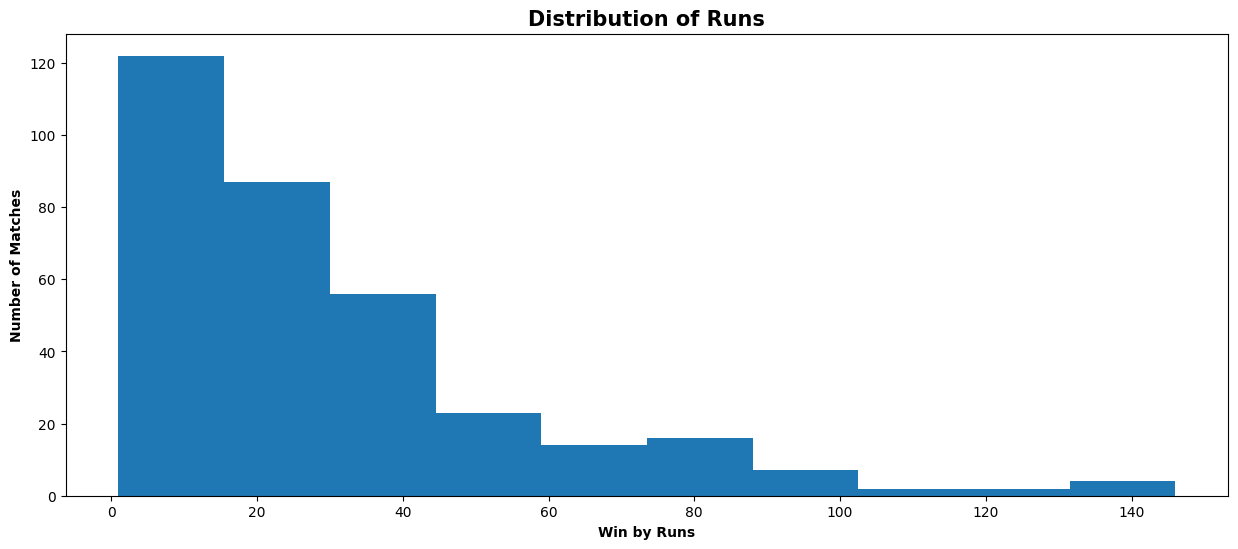

In [24]:
# Plotting a Histogram for visualizing the Distribution between Number of matches played and win by runs:
plt.figure(figsize=(15,6))
plt.hist(first_inning_win["win_by_runs"])
plt.title("Distribution of Runs",fontsize=15, fontweight='bold')
plt.xlabel("Win by Runs",fontweight='bold')
plt.ylabel("Number of Matches",fontweight='bold')
plt.show()

In [25]:
# Finding out the number of wins w.r.t each team after batting First:
first_inning_win["winner"].value_counts()

winner
Mumbai Indians                 57
Chennai Super Kings            51
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    34
Sunrisers Hyderabad            28
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: count, dtype: int64

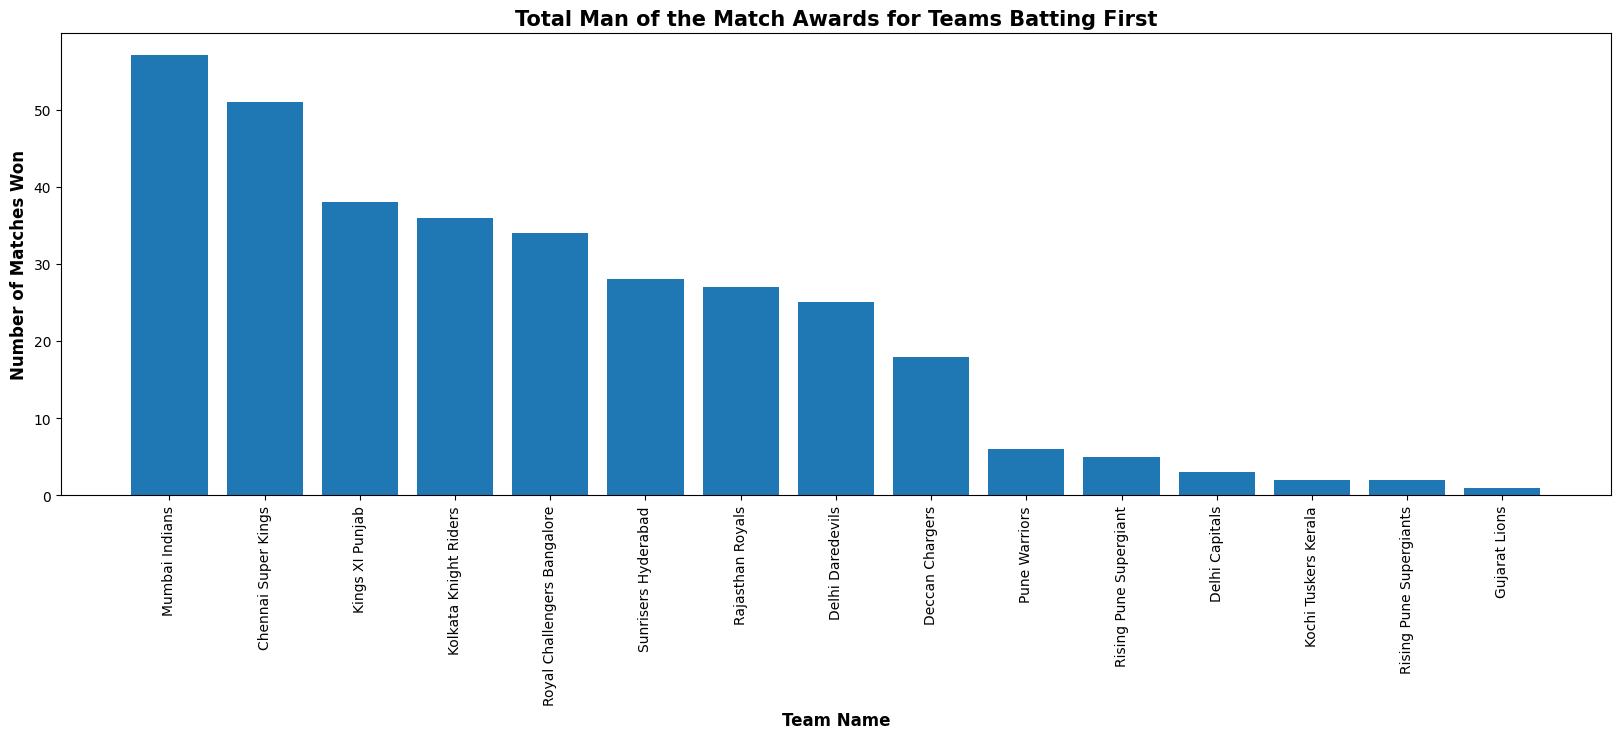

In [26]:
# Creating a bar chart for players with the most "Man of the Match" awards is a preferable choice over using a pie chart, 
# as the latter may become cluttered due to the numerous players involved.
plt.figure(figsize=(20,6))
player_name=first_inning_win["winner"].value_counts().keys()
player_win_count=first_inning_win["winner"].value_counts()
plt.bar(player_name,player_win_count)
plt.title("Total Man of the Match Awards for Teams Batting First",fontsize=15,fontweight='bold')
plt.xlabel("Team Name",fontsize=12,fontweight='bold')
plt.ylabel("Number of Matches Won",fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Reviewing all instances where a team has won when batting Second in a match.
second_inning_win=ipl_data[ipl_data["win_by_wickets"] != 0]

# Taking a look in the data for the teams who won the match by batting Second:
second_inning_win.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [28]:
# Looking for the total number of matches won by the team playing in the Second Inning:
print(second_inning_win.shape[0])

401


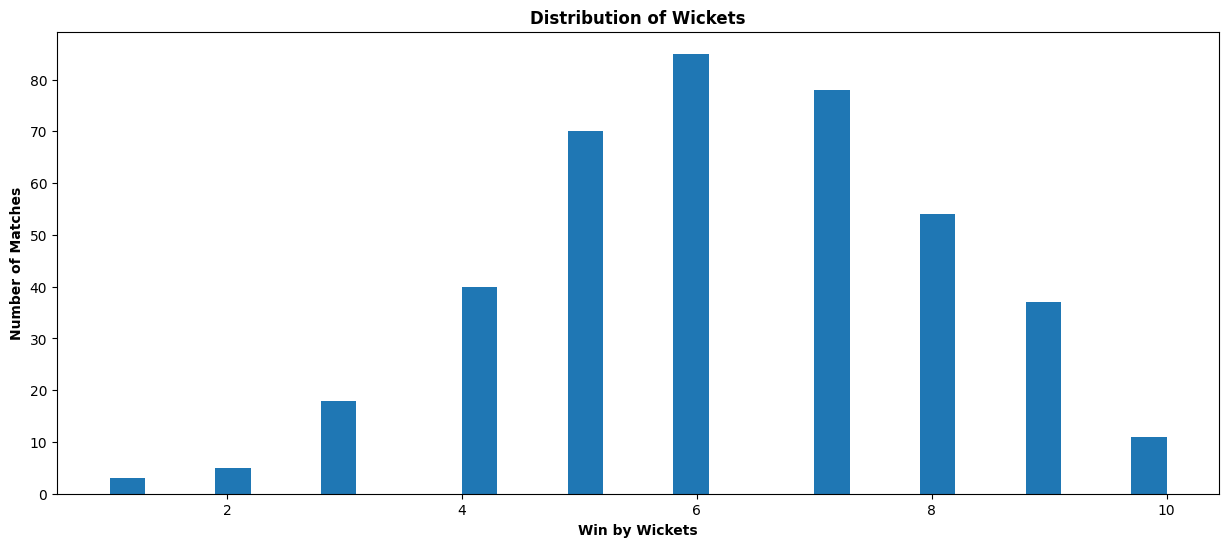

In [29]:
# Plotting a Histogram for visualizing the Distribution between Number of matches played and win_by_wickets:
plt.figure(figsize=(15,6))
plt.hist(second_inning_win["win_by_wickets"],bins=30)
plt.title("Distribution of Wickets", fontweight='bold')
plt.xlabel("Win by Wickets",fontweight='bold')
plt.ylabel("Number of Matches",fontweight='bold')
plt.show()

In [30]:
# Finding out the number of wins w.r.t each team after batting Second:
second_inning_win["winner"].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    47
Chennai Super Kings            47
Rajasthan Royals               46
Kings XI Punjab                41
Delhi Daredevils               41
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

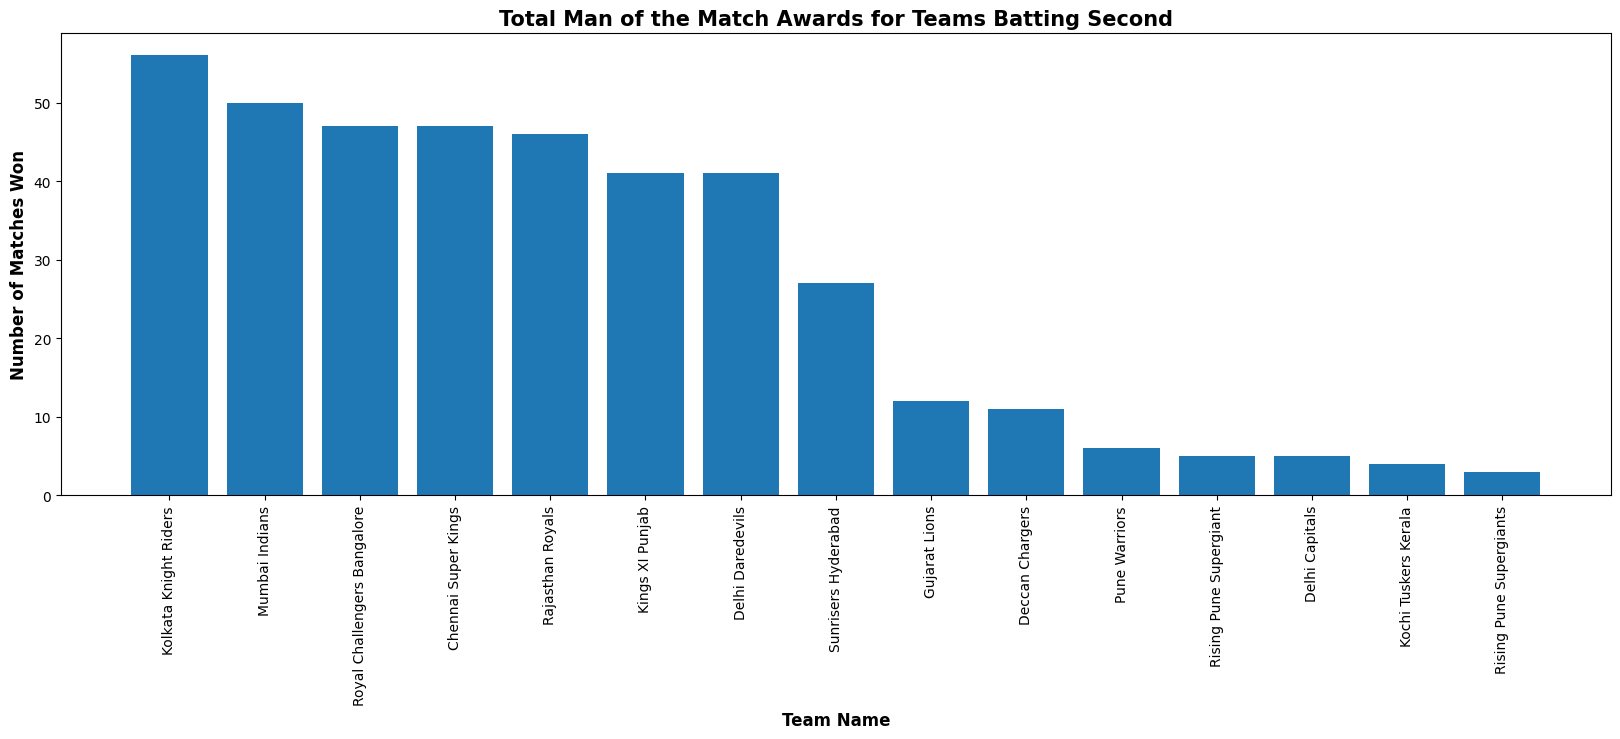

In [34]:
# Creating a bar chart for players with the most "Man of the Match" awards is a preferable choice over using a pie chart, 
# as the latter may become cluttered due to the numerous players involved.
plt.figure(figsize=(20,6))
player_name_1=list(second_inning_win["winner"].value_counts().keys())
player_win_count_1=list(second_inning_win["winner"].value_counts())
plt.bar(player_name_1,player_win_count_1)
plt.title("Total Man of the Match Awards for Teams Batting Second",fontsize=15,fontweight='bold')
plt.xlabel("Team Name",fontsize=12,fontweight='bold')
plt.ylabel("Number of Matches Won",fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [55]:
# Finding the total number of matches won after winning the 'Toss' and after Loosing the 'Toss':
result_pos=ipl_data['toss_winner'].eq(ipl_data['winner']).sum()
result_neg=ipl_data['toss_winner'].ne(ipl_data['winner']).sum()
print("The total number of matches won after winning the 'Toss' is:",result_pos,"\nThe total number of matches lost after Loosing the 'Toss' is:",result_neg)


The total number of matches won after winning the 'Toss' is: 388 
The total number of matches lost after Loosing the 'Toss' is: 355


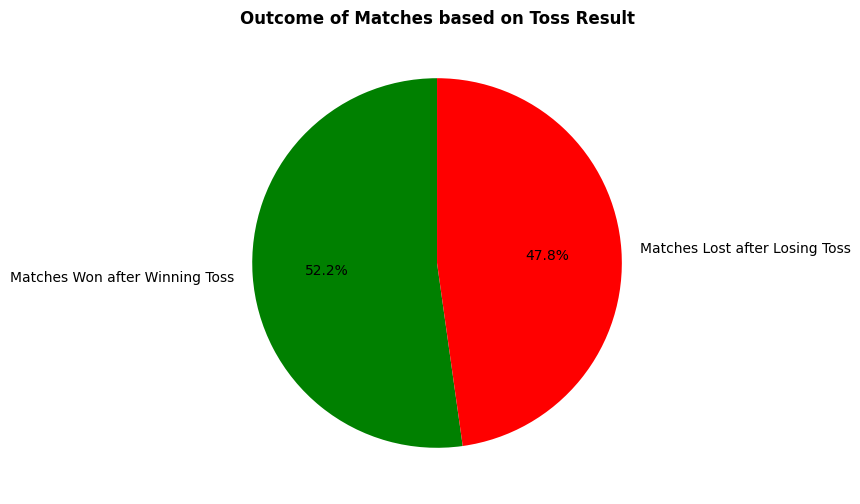

In [67]:
# PLotting a Pie chart to easly visualize the numbers of match won after winning the 'Toss' and after loosing the 'Toss'"
plt.figure(figsize=(12,6))
labels=['Matches Won after Winning Toss', 'Matches Lost after Losing Toss']
size=[result_pos,result_neg]
plt.pie(size,labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title("Outcome of Matches based on Toss Result",fontweight='bold')
plt.show()

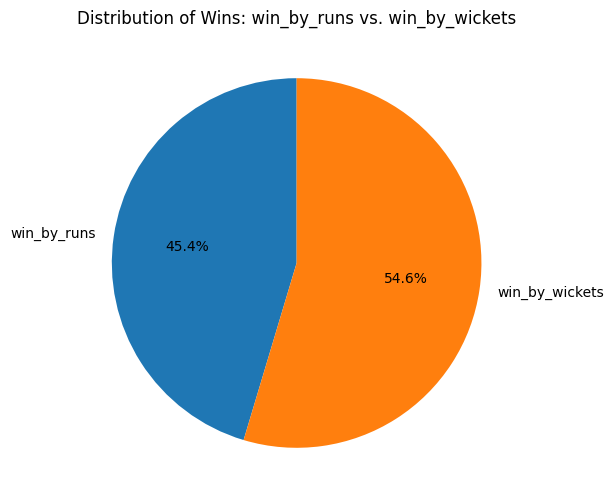

In [32]:
# Creating a Pie chart to illustrate the distribution between teams that won by batting first and those that won after batting second.
plt.figure(figsize=(15,6))
labels=['win_by_runs','win_by_wickets']
size=[first_inning_win.shape[0],second_inning_win.shape[0]]
plt.pie(size,labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Wins: win_by_runs vs. win_by_wickets")
plt.show()

In [71]:
# Now, I will once again read a file named "delivery.csv," which contains detailed ball-by-ball information for all the matches.
deliveries=pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python EDA\IPL EDA\deliveries.csv")

In [74]:
# Lets take a look for first 5 Rows of "deliveries.csv" dataset that i've stored in "deliveries" variable:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [78]:
# lets take a look at the total number of rows and columns in the "deliveries.csv" dataframe:
num_row_col=deliveries.shape
print(f"Total number of Rows is: '{num_row_col[0]}'\nTotal number of columns is: '{num_row_col[1]}'")

Total number of Rows is: '179078'
Total number of columns is: '21'


In [85]:
# Checking all the unique values present in the match_id column of deliveries:
deliveries['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

# Since there are **'11415'** numbers of unique match_id I'll be just analyse for the **'match_id 1'**: 

In [90]:
# Fetching all the data where match_id is 1:
match_id_1=deliveries[deliveries["match_id"]==1]

In [92]:
# Looking for the first 5 Rows of the dataset stored in the match_1 variable:
match_id_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [93]:
# Lets now look the the shape of the dataframe that we have stored in the match_1 varaible:
row_col=match_id_1.shape
print(f"Total number of Rows is: '{row_col[0]}'\nTotal number of columns is: '{row_col[1]}'")

Total number of Rows is: '248'
Total number of columns is: '21'


**The dataset contains a total of 248 rows, each representing the completion of one ball in the match with match_id 1. Typically, in a T-20 match, each team plays for 20 overs, and each over consists of 6 balls. Therefore, the total number of balls thrown by each team would be 20 * 6 = 120.**

**The discrepancy between the expected total (240 balls) and the actual total rows (248) suggests that there are additional events recorded, possibly representing wide balls or no-balls thrown during the match.**

In [96]:
# Let's now look over the 1st inning played by "Sunrisers Hyderabad":
sunrisers=match_id_1[match_id_1['inning']==1]

In [102]:
# Let's now check the frequency of the Runs Scored by the Team "Sunrisers Hyderabad":
score_board=sunrisers['batsman_runs'].value_counts()
for score,count in score_board.items():
    print(f"Total {score}'s {count}")

Total 1's 57
Total 0's 32
Total 4's 17
Total 6's 9
Total 2's 9
Total 3's 1


In [106]:
# Let's now examine the instances of player dismissals_kind by the team Sunrisers Hyderabad.
sunrisers['dismissal_kind'].value_counts()

dismissal_kind
caught    3
bowled    1
Name: count, dtype: int64

# Now lets do the same analysis for the team **"Royal Challengers Bangalore"** who played in the second inning:

In [113]:
# Let's now look over the 2nd inning played by "Royal Challengers Bangalore":
royal=match_id_1[match_id_1["inning"]==2]

In [116]:
# Let's now check the frequency of the Runs Scored by the Team "Royal Challengers Bangalore":
score_board=royal['batsman_runs'].value_counts()
for score,count in score_board.items():
    print(f"Total {score}'s {count}")

Total 0's 49
Total 1's 44
Total 4's 15
Total 6's 8
Total 2's 7


In [117]:
# Let's now examine the instances of player dismissals_kind by the team "Royal Challengers Bangalore".
royal['dismissal_kind'].value_counts()

dismissal_kind
caught     6
bowled     2
run out    2
Name: count, dtype: int64

Total extra balls played by 'Sunrisers Hyderabad' is: 5
Total extra balls played by 'Royal Challengers Bangalore' is: 3


C:\Users\akash\AppData\Local\Temp\ipykernel_3408\2841892777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=teams, y=extra_balls, palette='viridis')


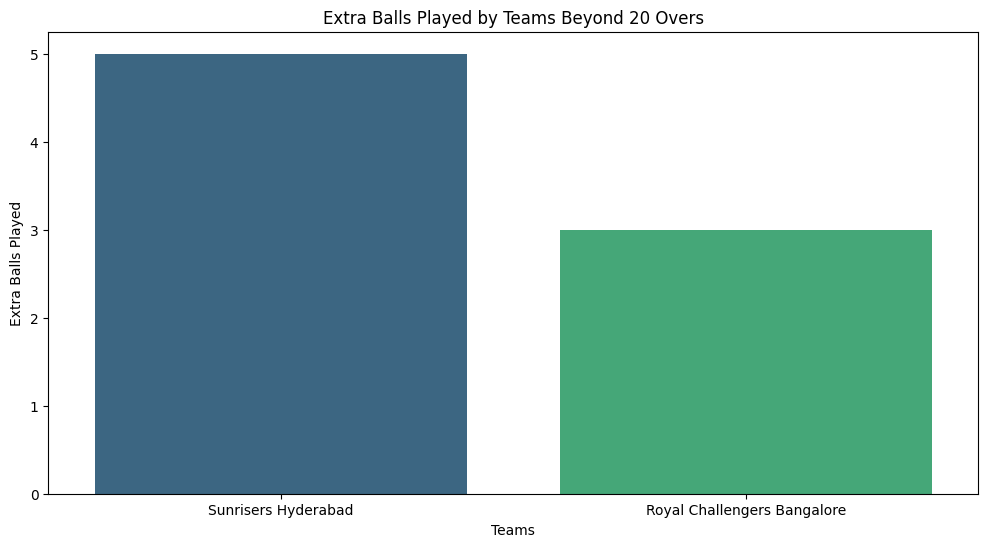

In [123]:
# Now lets check betwwen both the Team which Team has played how many Extra balls in the Match:
extra_balls_sunrisers = sunrisers.shape[0] - 120
extra_balls_royal = royal.shape[0] - 120
print(f"Total extra balls played by 'Sunrisers Hyderabad' is: {extra_balls_sunrisers}")
print(f"Total extra balls played by 'Royal Challengers Bangalore' is: {extra_balls_royal}")

# Creating a bar chart using seaborn
teams = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore']
extra_balls = [extra_balls_sunrisers, extra_balls_royal]

plt.figure(figsize=(12, 6))
sns.barplot(x=teams, y=extra_balls, palette='viridis')
plt.xlabel('Teams')
plt.ylabel('Extra Balls Played')
plt.title('Extra Balls Played by Teams Beyond 20 Overs')
plt.show()